Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Iter 12800 with normal batch, Minibatch Loss= 1988.503784, Training Accuracy= 0.78125
Iter 12800 with adversarial batch, Minibatch Loss= 1919.270386, Training Accuracy= 0.78906
Normal Batch Sample:


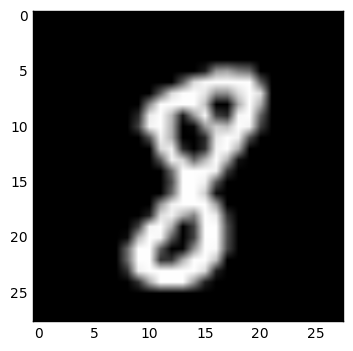

Adversarial Batch Sample:


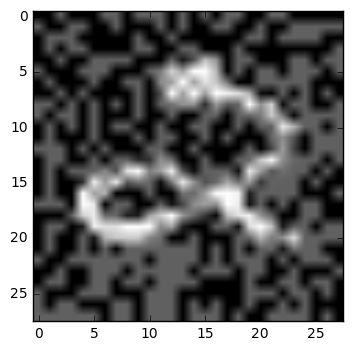

Iter 25600 with normal batch, Minibatch Loss= 741.829163, Training Accuracy= 0.82812
Iter 25600 with adversarial batch, Minibatch Loss= 698.598145, Training Accuracy= 0.84375
Normal Batch Sample:


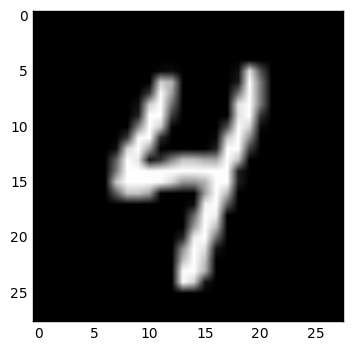

Adversarial Batch Sample:


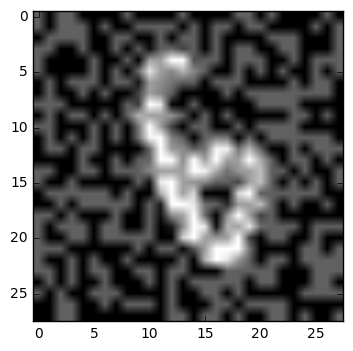

Iter 38400 with normal batch, Minibatch Loss= 185.971405, Training Accuracy= 0.90625
Iter 38400 with adversarial batch, Minibatch Loss= 182.748260, Training Accuracy= 0.90625
Normal Batch Sample:


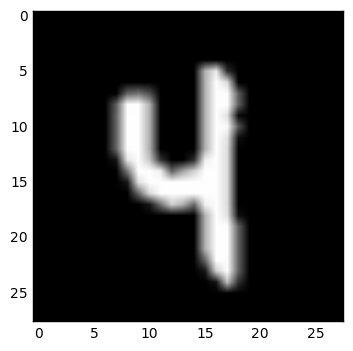

Adversarial Batch Sample:


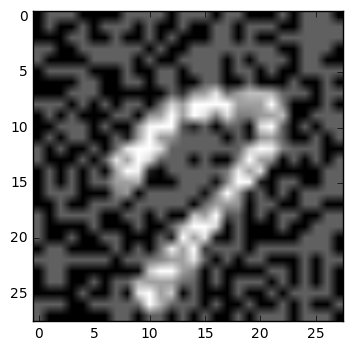

Iter 51200 with normal batch, Minibatch Loss= 177.994370, Training Accuracy= 0.85156
Iter 51200 with adversarial batch, Minibatch Loss= 177.228821, Training Accuracy= 0.85156
Normal Batch Sample:


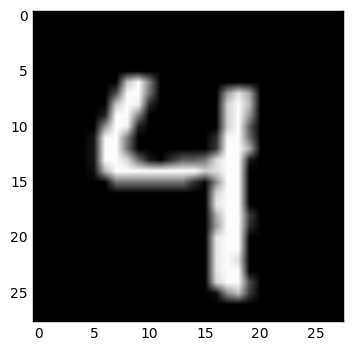

Adversarial Batch Sample:


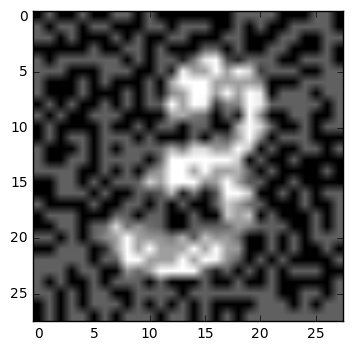

Iter 64000 with normal batch, Minibatch Loss= 180.286835, Training Accuracy= 0.85938
Iter 64000 with adversarial batch, Minibatch Loss= 178.065582, Training Accuracy= 0.85938
Normal Batch Sample:


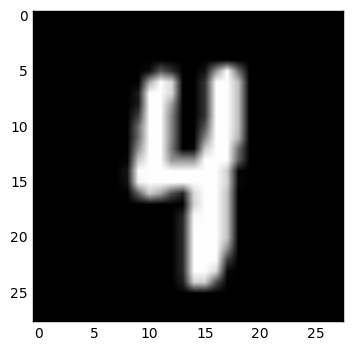

Adversarial Batch Sample:


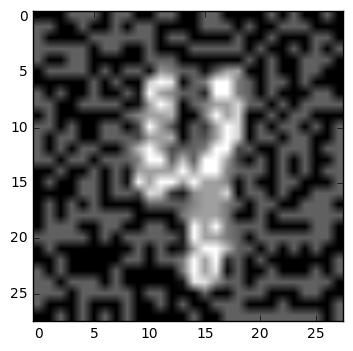

Iter 76800 with normal batch, Minibatch Loss= 201.943390, Training Accuracy= 0.77344
Iter 76800 with adversarial batch, Minibatch Loss= 200.465668, Training Accuracy= 0.77344
Normal Batch Sample:


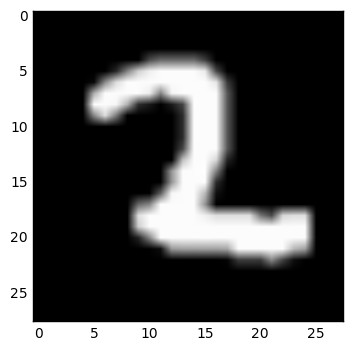

Adversarial Batch Sample:


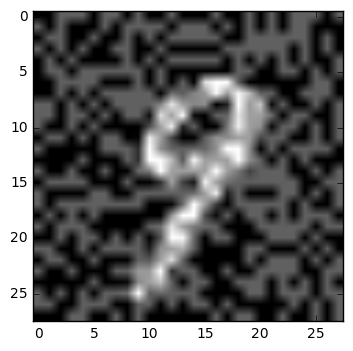

Iter 89600 with normal batch, Minibatch Loss= 132.616516, Training Accuracy= 0.73438
Iter 89600 with adversarial batch, Minibatch Loss= 131.090942, Training Accuracy= 0.73438
Normal Batch Sample:


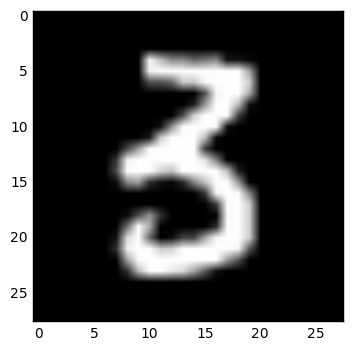

Adversarial Batch Sample:


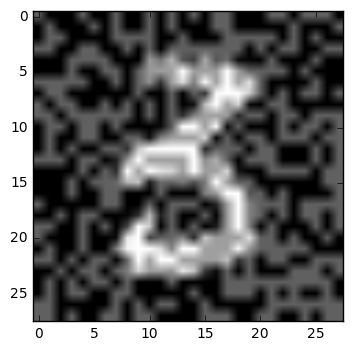

Iter 102400 with normal batch, Minibatch Loss= 60.431297, Training Accuracy= 0.62500
Iter 102400 with adversarial batch, Minibatch Loss= 59.164101, Training Accuracy= 0.62500
Normal Batch Sample:


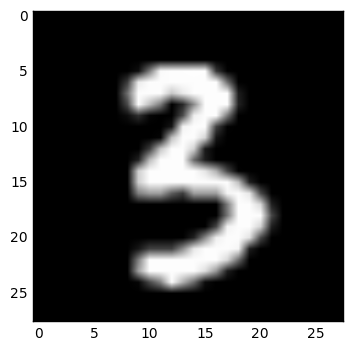

Adversarial Batch Sample:


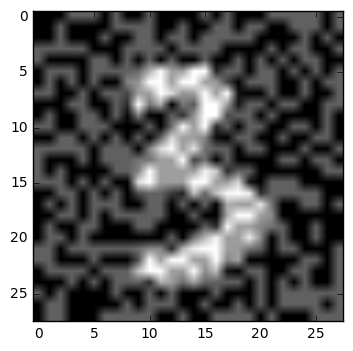

Iter 115200 with normal batch, Minibatch Loss= 22.166622, Training Accuracy= 0.50781
Iter 115200 with adversarial batch, Minibatch Loss= 21.688602, Training Accuracy= 0.50781
Normal Batch Sample:


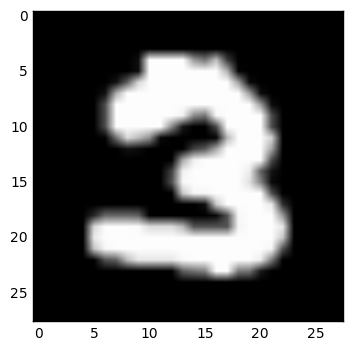

Adversarial Batch Sample:


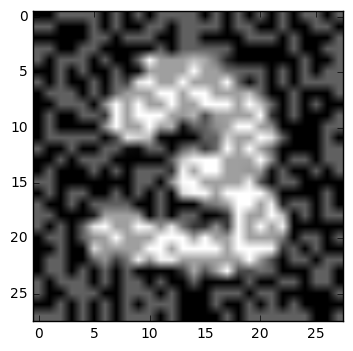

Iter 128000 with normal batch, Minibatch Loss= 22.799124, Training Accuracy= 0.40625
Iter 128000 with adversarial batch, Minibatch Loss= 22.543839, Training Accuracy= 0.40625
Normal Batch Sample:


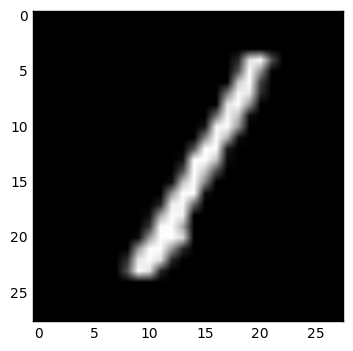

Adversarial Batch Sample:


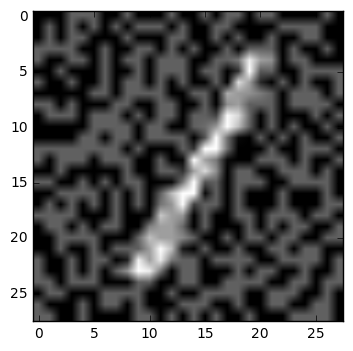

Iter 140800 with normal batch, Minibatch Loss= 11.699190, Training Accuracy= 0.24219
Iter 140800 with adversarial batch, Minibatch Loss= 11.375741, Training Accuracy= 0.24219
Normal Batch Sample:


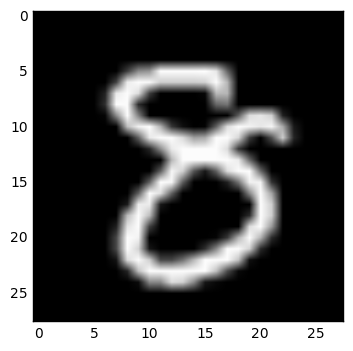

Adversarial Batch Sample:


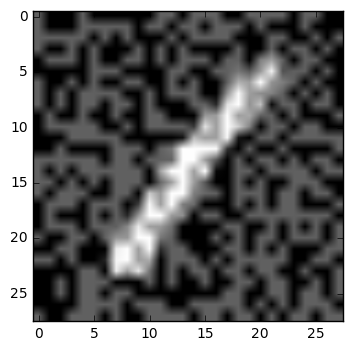

Iter 153600 with normal batch, Minibatch Loss= 9.740631, Training Accuracy= 0.24219
Iter 153600 with adversarial batch, Minibatch Loss= 9.484879, Training Accuracy= 0.24219
Normal Batch Sample:


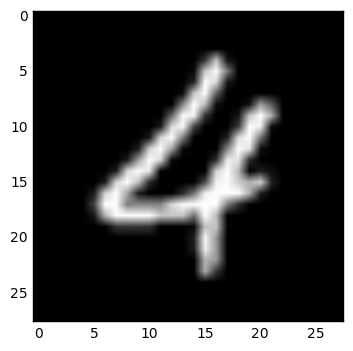

Adversarial Batch Sample:


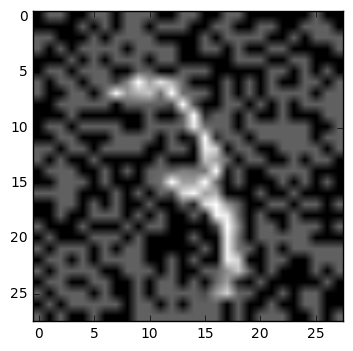

Iter 166400 with normal batch, Minibatch Loss= 5.097835, Training Accuracy= 0.21094
Iter 166400 with adversarial batch, Minibatch Loss= 5.043773, Training Accuracy= 0.21094
Normal Batch Sample:


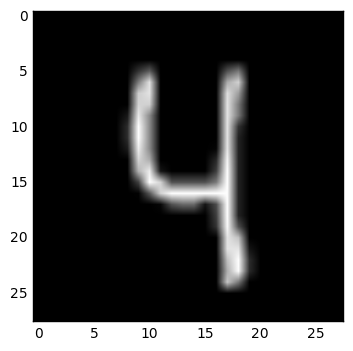

Adversarial Batch Sample:


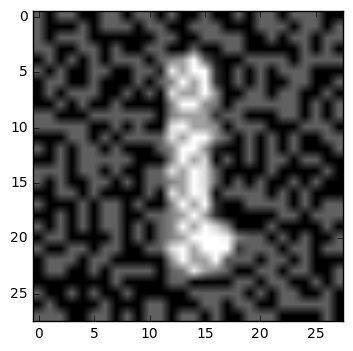

Iter 179200 with normal batch, Minibatch Loss= 6.159092, Training Accuracy= 0.14062
Iter 179200 with adversarial batch, Minibatch Loss= 5.780171, Training Accuracy= 0.14062
Normal Batch Sample:


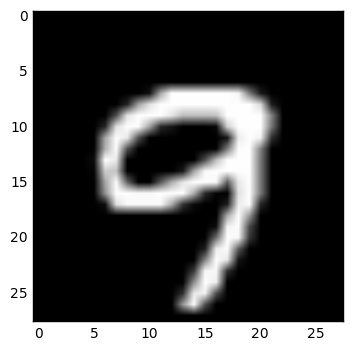

Adversarial Batch Sample:


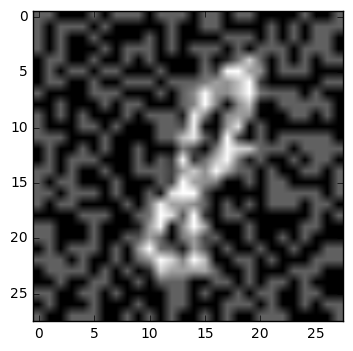

Iter 192000 with normal batch, Minibatch Loss= 2.705726, Training Accuracy= 0.13281
Iter 192000 with adversarial batch, Minibatch Loss= 2.701255, Training Accuracy= 0.13281
Normal Batch Sample:


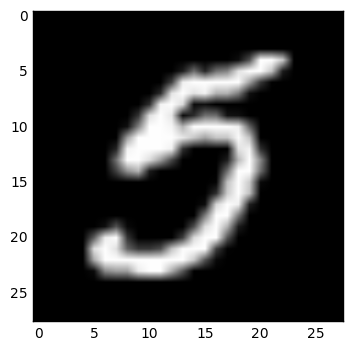

Adversarial Batch Sample:


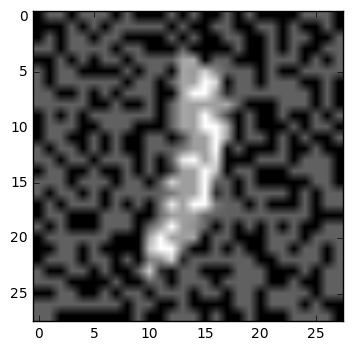

Accuracy for Adversarial MNIST: 0.140625


In [16]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# CNN Model
def fgsm(x, loss, eps):
    perturbation = eps*tf.sign(tf.gradients(loss, x)[0])
    adv_x = tf.stop_gradient(x + perturbation)
    return adv_x

# Input Data and Labels
training_data = tf.placeholder(tf.float32, [None, 784])
training_labels = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

# Defining Variables
layer1 = tf.Variable(tf.random_normal([5,5,1,32]))
bias1 = tf.Variable(tf.random_normal([32]))

# 1st Convoluted Layer
x = tf.reshape(training_data, shape = [-1, 28, 28, 1])
x = tf.nn.conv2d(x, layer1, strides = [1,1,1,1], padding = 'SAME')
x = tf.nn.bias_add(x, bias1)
x = tf.nn.relu(x)

#1st Pooling Layer
x = tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

# Defining Variables
layer2 = tf.Variable(tf.random_normal([5,5,32,64]))
bias2 = tf.Variable(tf.random_normal([64]))

# 2nd Convoluted Layer
x = tf.nn.conv2d(x, layer2, strides =[1,1,1,1], padding = 'SAME')
x = tf.nn.bias_add(x, bias2)
x = tf.nn.relu(x)

#2nd Pooling Layer
x = tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

#Defining Variables
layer3 = tf.Variable(tf.random_normal([7*7*64, 1024]))
bias3 = tf.Variable(tf.random_normal([1024]))

#Fully-Connected Layer
x = tf.reshape(x, [-1, 7*7*64])
x = tf.add(tf.matmul(x, layer3), bias3)
x = tf.nn.relu(x)
x = tf.nn.dropout(x, keep_prob)

#Converting to class scores
layer4 = tf.Variable(tf.random_normal([1024, 10]))
bias4 = tf.Variable(tf.random_normal([10]))

output =  tf.add(tf.matmul(x, layer4), bias4)

# Calculating Loss Function
loss_vector = tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=training_labels)
fgsm = fgsm(training_data, loss_vector, 0.3)
cost = tf.reduce_mean(loss_vector)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
correct_pred = tf.equal(tf.argmax(output, 1), tf.argmax(training_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#---------------------------------------------------------------------------------------------------------------------------#

init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)
    step = 1
    
    # Keep training until reach max iterations
    while step * 128 < 200000:
        batch_x, batch_y = mnist.train.next_batch(128)
        opt, fg =sess.run([optimizer, fgsm], feed_dict = {training_data: batch_x, training_labels: batch_y, keep_prob: 0.75})
        loss, acc = sess.run([cost, accuracy], feed_dict={training_data: batch_x,
                                                           training_labels: batch_y, keep_prob: 1
                                                              })
        cache = []
        cache_label = []
        counter =0
        for x in fg:
            if (not np.array_equal(x, batch_x[counter])):
                cache+=[x]
                cache_label +=[batch_y[counter]]
            counter+=1
        
        sess.run(optimizer, feed_dict = {training_data: cache, training_labels: cache_label, keep_prob: 0.75})
        loss1, acc1 = sess.run([cost, accuracy], feed_dict={training_data: batch_x,
                                                            training_labels: batch_y, keep_prob: 1
                                                              })
        if(step%100==0):
            print("Iter " + str(step*128) + " with normal batch, Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
            print("Iter " + str(step*128) + " with adversarial batch, Minibatch Loss= " + \
                  "{:.6f}".format(loss1) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc1))
            print("Normal Batch Sample:")
            pixels = batch_x[0].reshape(28, 28)
            plt.imshow(pixels, cmap='gray')
            plt.show()
            print("Adversarial Batch Sample:")
            pixels = cache[0].reshape(28, 28)
            plt.imshow(pixels, cmap='gray')
            plt.show()
        step += 1
        
    
    acc, fgsmtest = sess.run([accuracy, fgsm], feed_dict={training_data: mnist.test.images[:128],
                                      training_labels: mnist.test.labels[:128],
                                      keep_prob: 1.})
    print("Accuracy for Adversarial MNIST:", sess.run(accuracy, feed_dict={training_data: fgsmtest,
                                      training_labels: mnist.test.labels[:128],
                                      keep_prob: 1.}))
    
    
    
    
    
    